In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [45]:
df= pd.read_csv('customer_segmentation.csv')

In [3]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


# Exploring the dataset #
We can observe that the daset has 14 columns and 10127 entries, we have no missing values in the dataset.
Gender,education_level and marital_status_columns are categorical, others numerical. <br> * The youngest person in the data set is 26 years old and the oldest is 73 years old <br> * The avereage estimated income in the dataset is 62K USD. <br> * Credit limit varies from 1438 USD up to 34 516 USD.

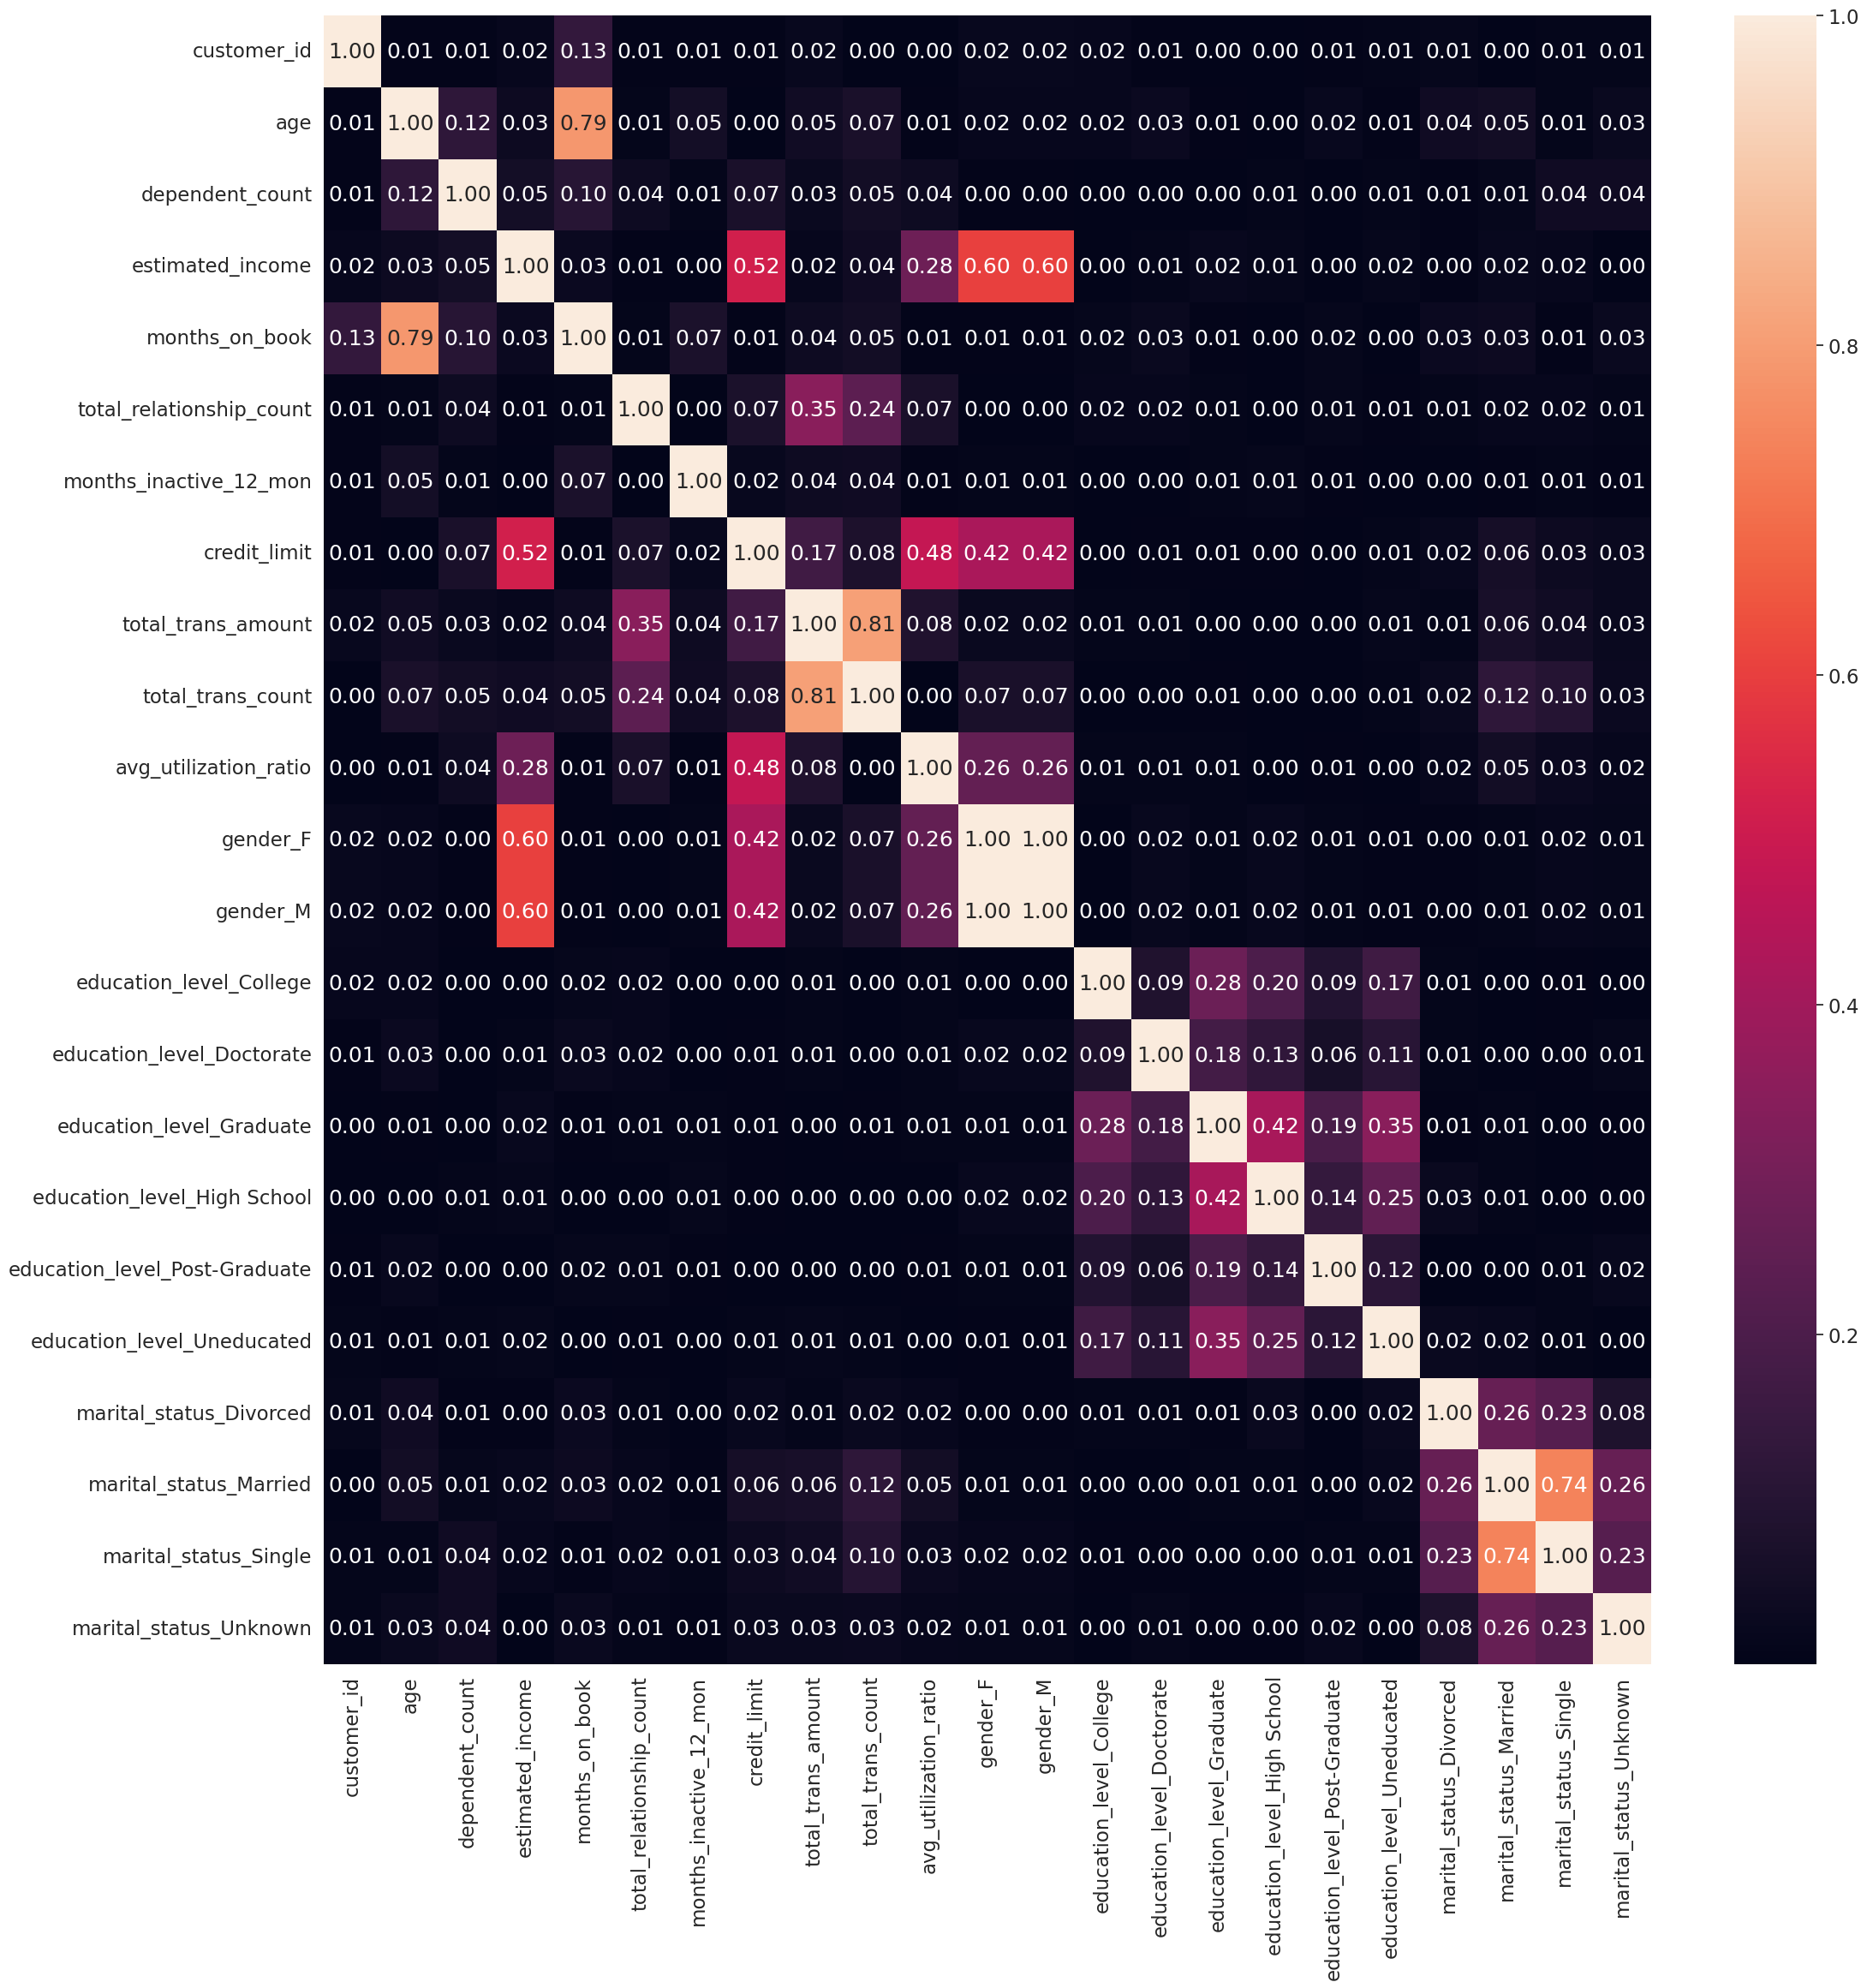

In [49]:
df_correlations=df.copy()
df_correlations=pd.get_dummies(data = df_correlations, columns = ['gender','education_level','marital_status'])
correlations=df_correlations.corr(method='pearson').abs()
plt.figure(figsize=(25, 25))
heat_map=sns.heatmap(correlations,annot=True,fmt='.2f')

* Based on the heatmap we can see the most significant correlation is between:  <br> * months on book and age <br> * total transactions amount and total transaction count <br> * marital status single and marital status married <br> * credit limit and estimated income <br> * estimated income and gender (both male and female)

In [10]:
# fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(7,20))
# y=df['age'].value_counts().sort_index()
# ax[1]=y.plot(kind='bar')
# #plt.title(label='Age distribution')
# #plt.xlabel('Age')
# #plt.ylabel('Count')
# plt.show()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

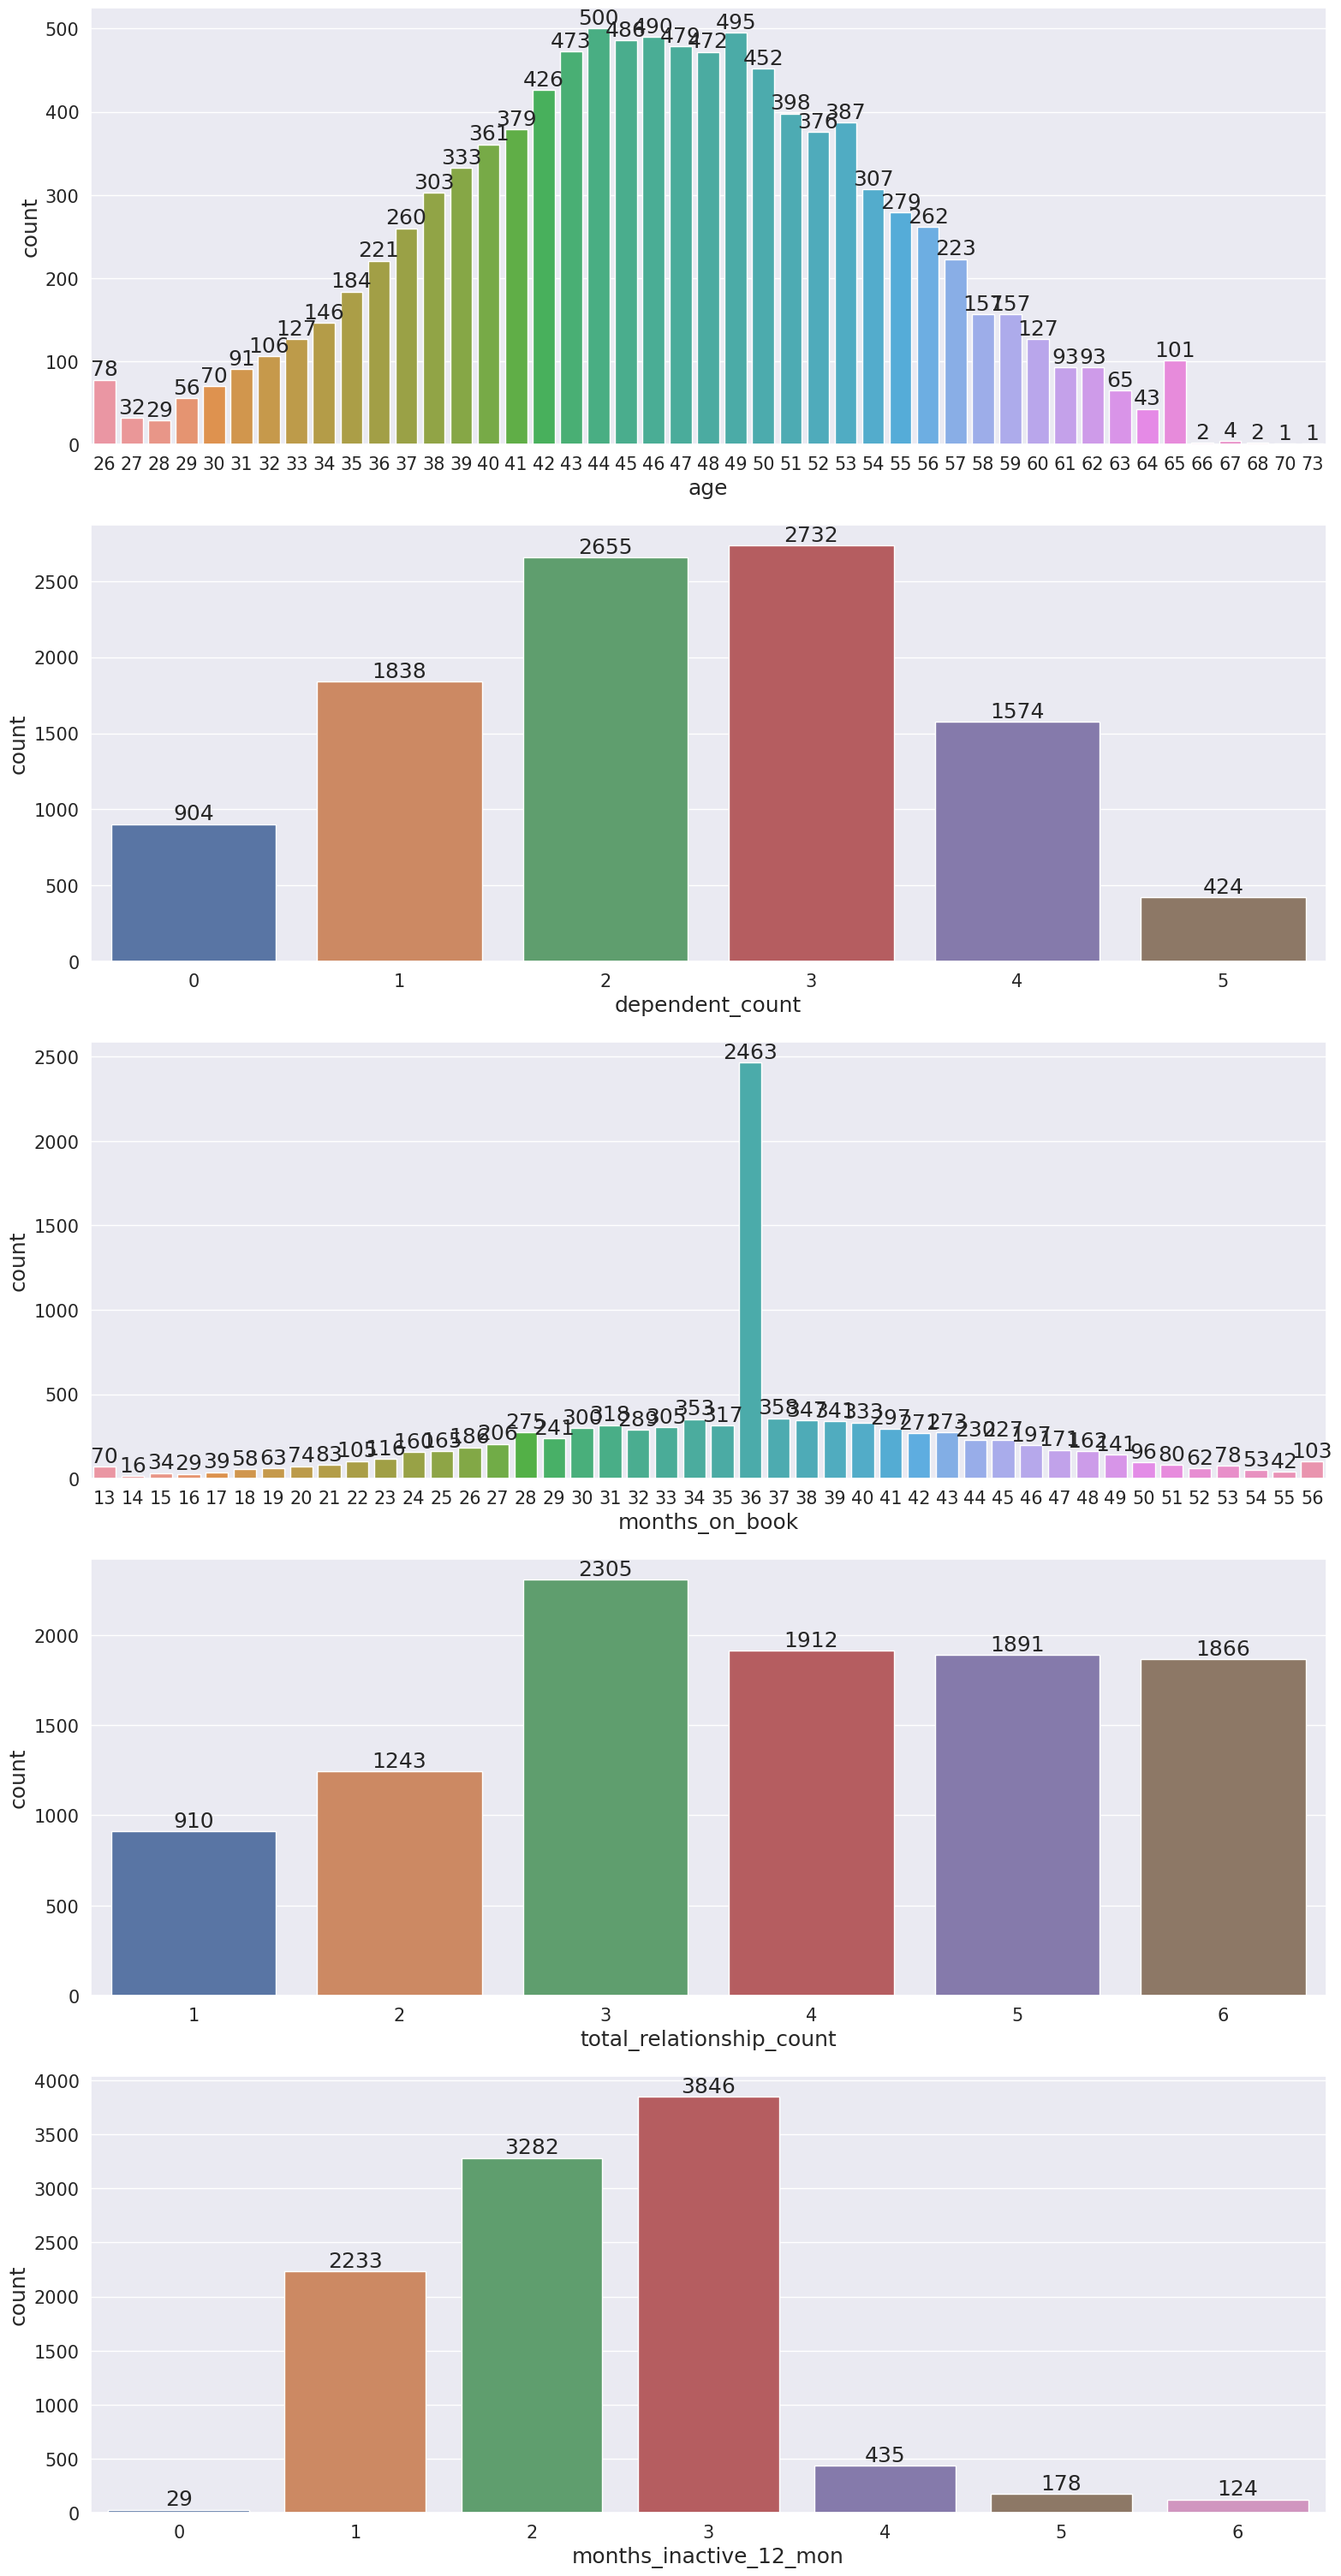

In [38]:
numerical_cols = ["age","dependent_count","months_on_book","total_relationship_count","months_inactive_12_mon"]
fig = plt.figure(figsize=(16,60))
sns.set(font_scale=1.5)
for idx, col in enumerate(numerical_cols):
    ax = plt.subplot(10, 1, idx+1)
    sns.countplot(x=df[col], ax=ax)
    # add data labels to each bar
    # plt.ylabel('Percentage',fontsize=20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    for container in ax.containers:
        ax.bar_label(container, label_type="edge")
    fig.tight_layout()
        

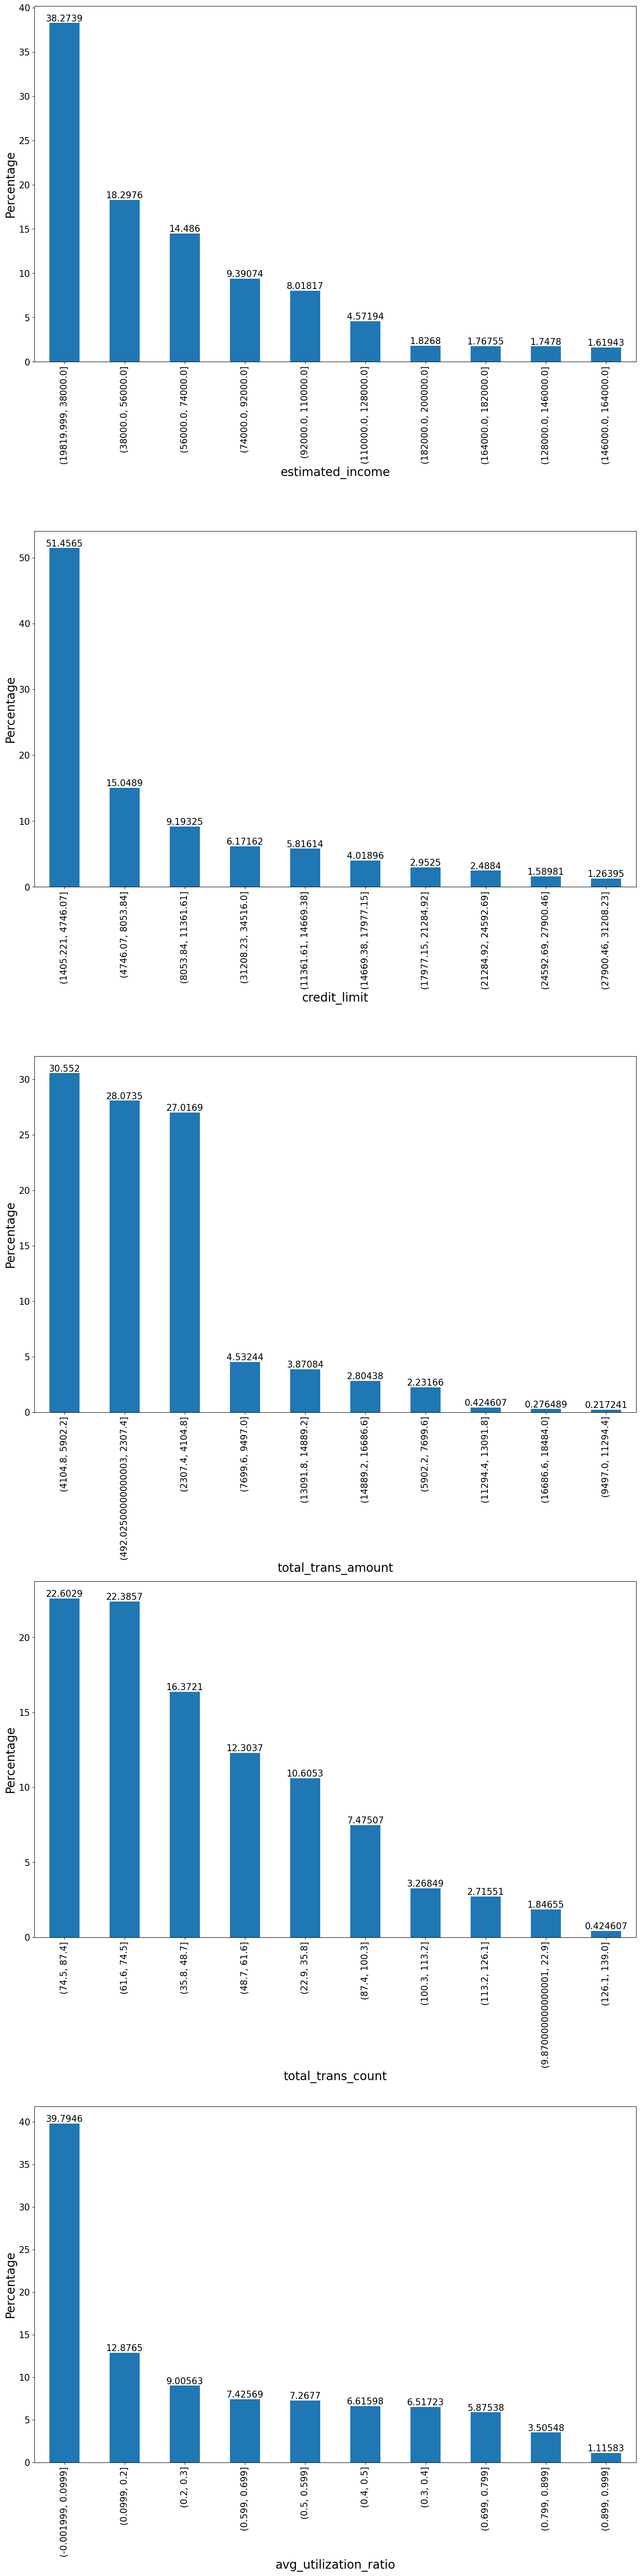

In [20]:
est_in=df["estimated_income"].value_counts(bins=10,normalize=True)*100
cre_lim=df["credit_limit"].value_counts(bins=10,normalize=True)*100
tot_tram=df["total_trans_amount"].value_counts(bins=10,normalize=True)*100
tot_trac=df["total_trans_count"].value_counts(bins=10,normalize=True)*100
avg_ura=df["avg_utilization_ratio"].value_counts(bins=10,normalize=True)*100
cols=[est_in,cre_lim,tot_tram,tot_trac,avg_ura]

fig = plt.figure(figsize=(15,60))
for idx, col in enumerate(cols):
    ax= plt.subplot(5, 1,idx+1)
    ax=col.plot(kind='bar')
    #plt.title(label='Age distribution')
    plt.xlabel(col.name,fontsize=20)
    plt.ylabel('Percentage',fontsize=20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15) 
#     # add data labels to each bar
    for container in ax.containers:
         ax.bar_label(container, label_type="edge",fontsize=15)
    fig.tight_layout()



## From the above graphs we can observe that in the data set: 
*Age distribution follows a bell curve with most common customer age being between 35 years old to 55 years old, which reflect people in their professional career phase. <br> * Customers have typically 2 or 3 dependents. <br> * Have been in the books for 36 months. <br> * Customers have contacted the company typically 3 times. <br> * In the past 12 months customers have typically not useed their credit card between 1 to 3 months. <br> * The most typical estimate annual income bracket is 19 000 USD to 38 000 USD. <br> * 51% of the customers have a credit limit between 1400 USD and 4 700 USD. <br> * Nearly 85% of the customers had total transaction amount in between 490 USD and 5 900 USD. <br> * Nearlu 50% of the customers had performed 61 to 87 credit card transactions in total. <br> * Approximately 40% of the customers had their average daily utilization ration between -0.0002 and 0.1.  

# Feature engineering

* Converting categorical columns into numerical values


In [56]:
customers_modif= df.copy()
my_dict={'M':1,'F':0}
my_edu_dict={'Uneducated':0,
'High School':1,
'College':2,
'Graduate':3,
'Post-Graduate':4,
'Doctorate':5}
customers_modif['gender']=customers_modif['gender'].replace(my_dict)
customers_modif['education_level']=customers_modif['education_level'].replace(my_edu_dict)

array([1, 3, 0, 4, 2, 5])

In [64]:
# Converting marital status into dummy variables.
#customers_modif=pd.get_dummies(data = customers_modif, columns = ['marital_status'])

In [71]:
#customers_scaled=customers_modif.drop('customer_id',axis=1)
scaler = StandardScaler()
scaler.fit(customers_scaled)
df_scaled = scaler.transform(customers_scaled)
df_scaled=pd.DataFrame(df_scaled)
print(df_scaled)

             0         1         2         3         4         5         6   \
0     -0.165406  1.059956  0.503368 -0.752211  0.175810  0.384621  0.763943   
1      0.333570 -0.943436  2.043199  0.662787 -0.967166  1.010715  1.407306   
2      0.583058  1.059956  0.503368  0.662787  0.785397  0.008965  0.120579   
3     -0.789126 -0.943436  1.273283 -0.752211 -0.636973 -0.241473 -0.522785   
4     -0.789126  1.059956  0.503368 -1.459710  0.074212 -1.869317  0.763943   
...         ...       ...       ...       ...       ...       ...       ...   
10122  0.458314  1.059956 -0.266547  0.662787 -0.281380  0.509840 -0.522785   
10123 -0.664382  1.059956 -0.266547  0.662787 -0.560775 -1.368442  0.120579   
10124 -0.290150 -0.943436 -1.036462 -0.752211 -0.738571  0.008965  0.763943   
10125 -2.036565  1.059956 -0.266547  0.662787 -0.382978  0.008965  0.120579   
10126 -0.414894 -0.943436 -0.266547  0.662787 -0.662372 -1.368442  1.407306   

             7         8         9         10      

# Choosing K

* Deciding the number of clusters by computing inertia on the number of clusters ranging from 1to 10.

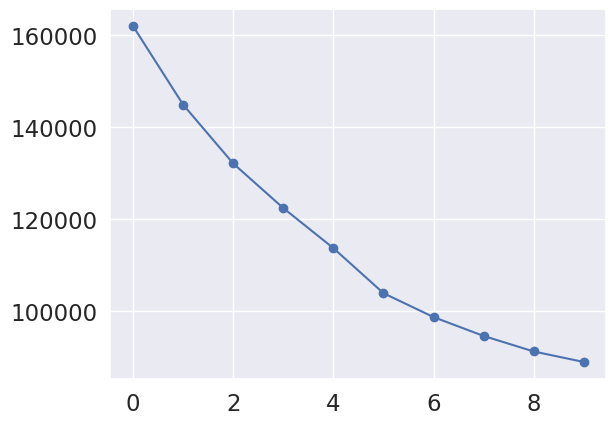

In [74]:
inertia=[]
for i in range (1,11):
    model = KMeans(n_clusters=i)
    clusters = model.fit_predict(df_scaled)
    inertia.append(model.inertia_)

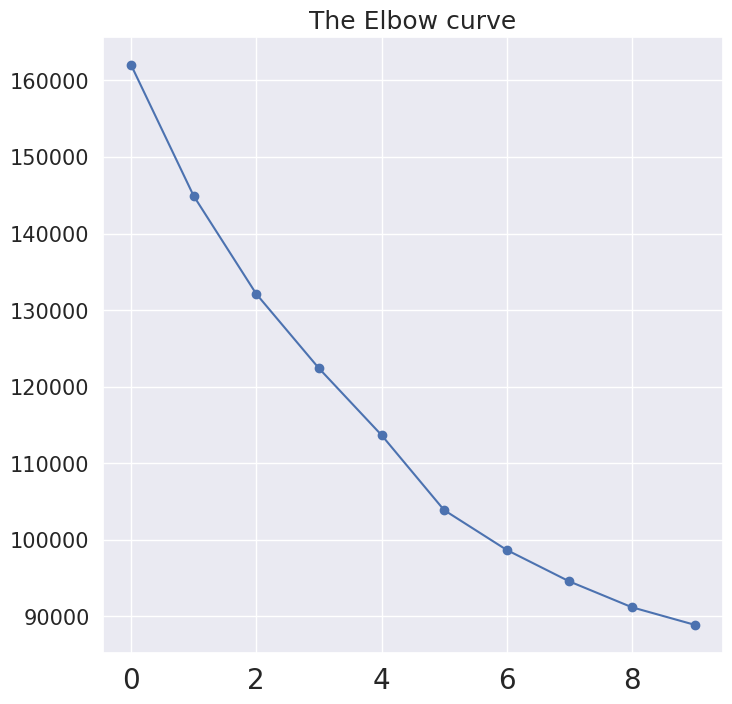

In [85]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(10),inertia,marker='o')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)
plt.title(label='The Elbow curve')
#fig.tight_layout()
plt.show()

* From the above K-means cluster inertia elbow curve we can see the ideal number of cluster is 5, as moving from 5 to 6 clusters and onwards the inertia drops less.

In [86]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(df_scaled)
print(clusters)

[1 4 1 ... 1 0 1]


# Analysing the dataset based on assigned clusters

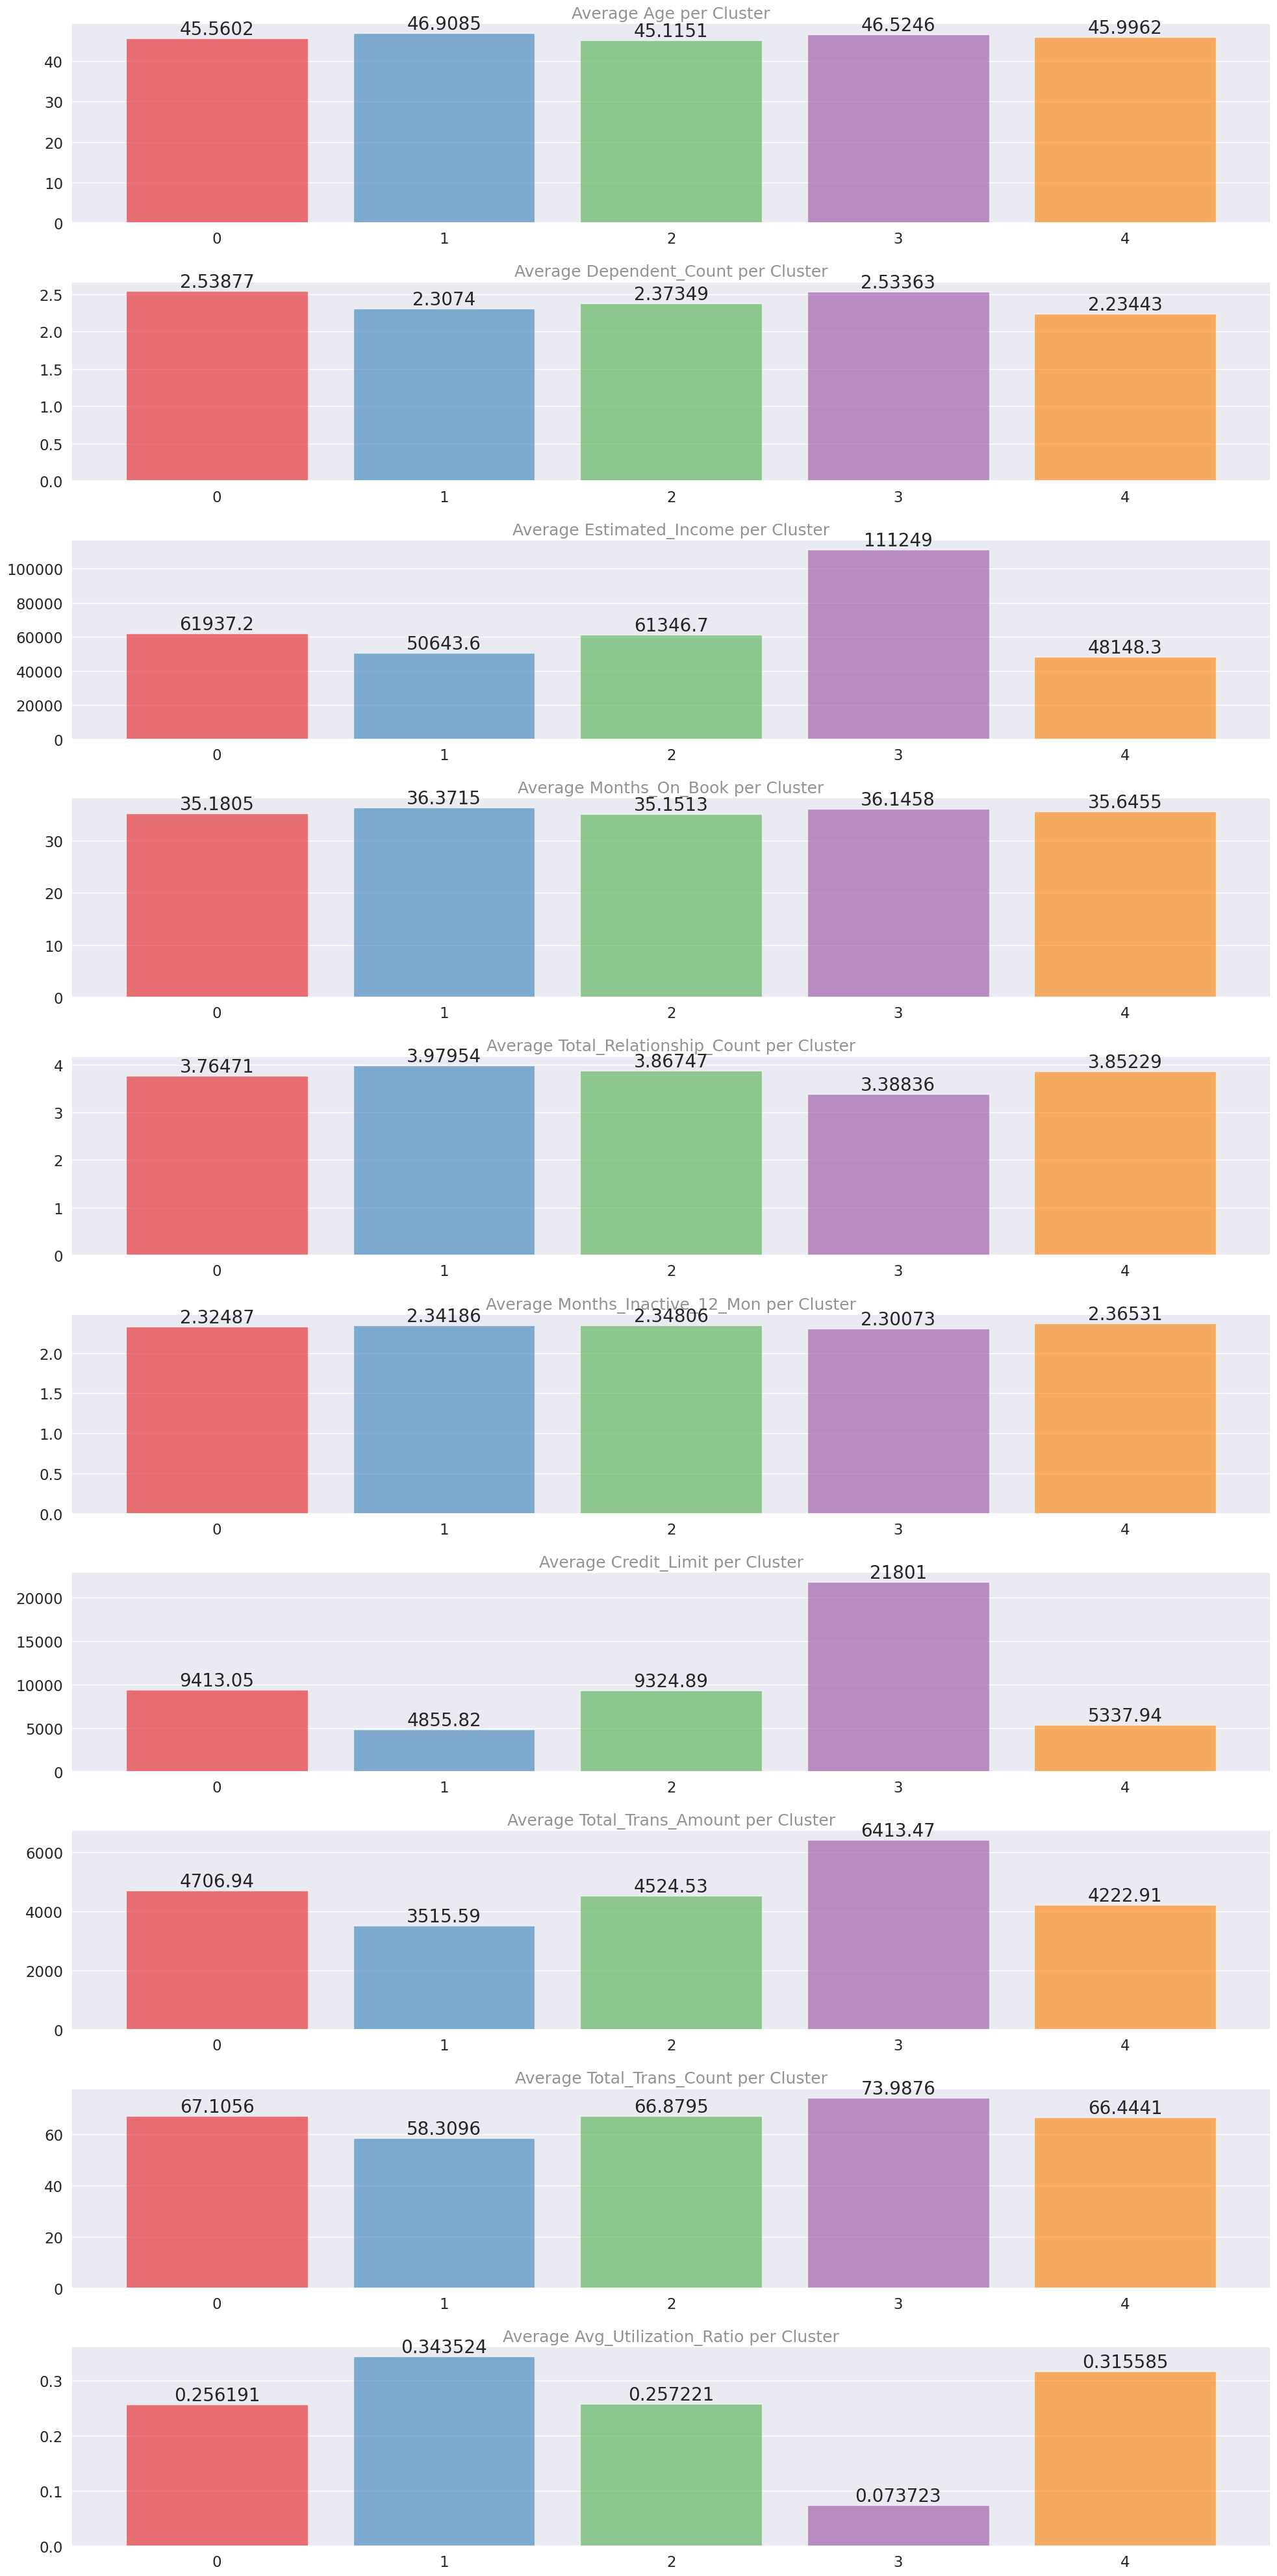

In [104]:
df['CLUSTER']=clusters
numeric_columns=['age','dependent_count','estimated_income','months_on_book','total_relationship_count','months_inactive_12_mon','credit_limit','total_trans_amount','total_trans_count','avg_utilization_ratio']

fig = plt.figure(figsize=(20, 40))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(10, 1, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    for container in ax.containers:
        ax.bar_label(container, label_type="edge",fontsize=20)

plt.tight_layout()
plt.show()


*Each cluster has a very similar average age distribution around 45 years <br> *All 5 clustrs also have very even number of dependants from 2 to 3. <br> *Cluster 3 significantly higher estimated income, above 110 000 USD, which is double compared to some of the other clusters. <br> *Averegae number of months on book is around 35 months in all of the clusters <br> *The average count of relationship is between 3 and for 4 in all of the clusters. <br> *The average number of inactive months is 2 months in all of the clusters. <br> *Cluster 3 customers have the highest credit limits, almost 4 times higher than cluster 1 customers. <br> *Average Total transaction amount is also higher for cluster 3, as these customers have higher income and higher credit limit. <br> In average number of transactions customers in cluster 3 have the highest average with 73 transactions , however other clusters have 53 to 67 transactions on average. The number of transactions between clusters is similar, the cluster 3 customers have higher average value of the transactions. <br> *Cluster 3 has the lowest average utilisation rate, which indicates them not being as reliant on the credit card than for example cluster 1 which has the second lowest estimated income and the lowest credit limit.

# Analysing numerical variables with high correlation by using Seaborn Scatterplot

* In the above step from the heatmap we can identify high correlation between the following numerical variabels:
<br>* months on book and age
<br>* total transactions amount and total transaction count
<br>* credit limit and estimated income



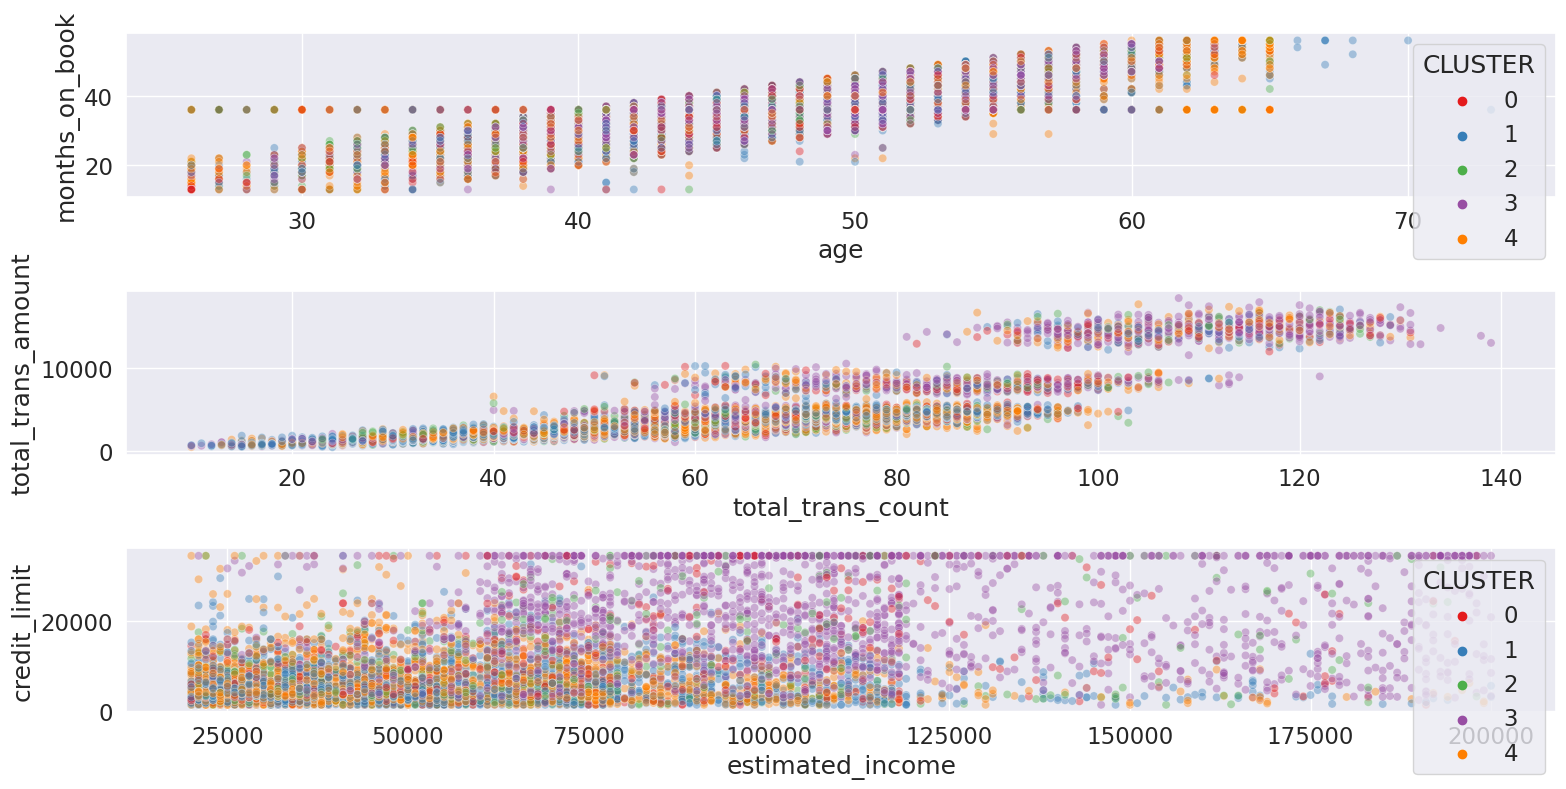

In [111]:
fig, axs = plt.subplots(3, 1, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=df, palette='Set1', alpha=0.4,ax=axs[0])
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=df, palette='Set1', alpha=0.4, ax=axs[1], legend=False)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=df, palette='Set1', alpha=0.4, ax=axs[2])

plt.tight_layout()
plt.show()


*We can see a logical correlation between customers age and the number of months as the customer, and interestingly cluster 1 has the oldest customers who are closer to 70 yers old and have been customers the longest. Cluster 3 with the highest income are more in the 40 to 50 years of age, which would indicate working professionals higher in their career <br> *Total transaction amount grows as the total count increases, and the highest total amount is in the cluster 3 and 4, which have the highest estimated income. <br> * As seen in the earlier bar graphs cluster 3 has the highest estimated income, which reflects the credit limit as seen in the scatterplot. Also cluster 4 has the lowest estimated income hence the lowest credit limit. 

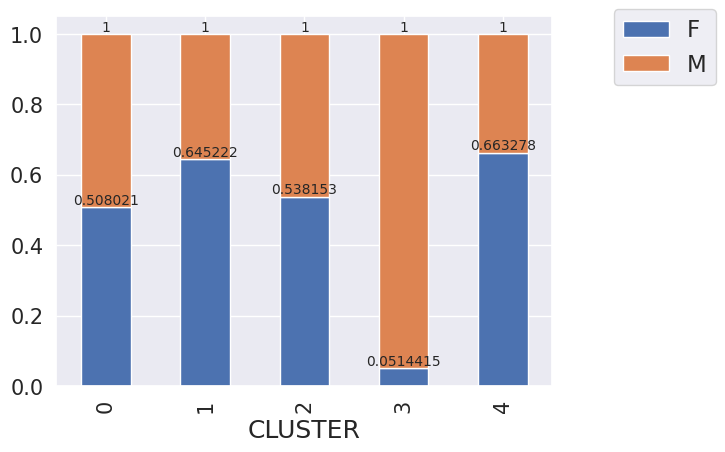

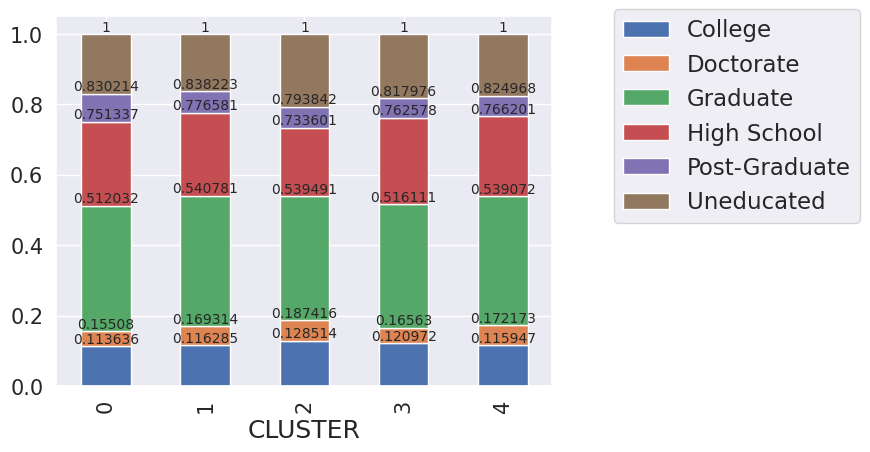

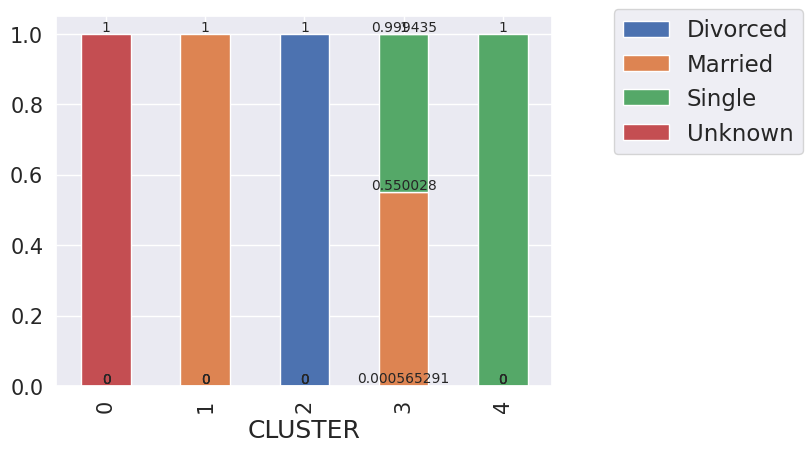

In [137]:
cols=['gender','education_level','marital_status']
for idx, col in enumerate(cols):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col],values=df[col], aggfunc='size', normalize='index')
    #ax= plt.subplot(3, 1,idx+1)
    ax=plot_df.plot(kind='bar', stacked=True)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
#     # add data labels to each bar
    for container in ax.containers:
         ax.bar_label(container, label_type="edge",fontsize=10)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()


# Conclusions:
*Cluster 0: Is the only cluster with equal distribution of men and women, all of them have marital status "unknown" and majority of them have either a Graduate or High-school educatoin. This is then reflected on the estimated income average of 62 000 USD. These customers could be offered conservative credit products to ensure their capability to pay their credit card debts <br> *Cluster 1 has 65% of female and education distribution is nearly identical to cluster 0, however 100% of cluster 1 customers are married. And customers in this cluster have the lowest credit limit. As these customers are families, they could be offered services best catered for family financial needs. <br> *Cluster 2 has 53% of women with education distributions similar to other clusters. Customers in this cluster are all divorced, and have stimated income of 61 000 USD. These customers could be offered similar conservative products as cluster 0 <br> * Cluster 3 has 99.5% of men, equally married and single, with similar education to other clusters. This is the cluster with highest estimated income and credit limit. Therefore these would be the most lucrative customers to offer credit instruments as they are able to pay their credit card debts and already spend more money on average in transactions. <br> * Cluster 4 has 66% of women who are all singel and education distribution is similar to other clusters.These customers had the lowest estimated income of 48 000 USD,but the second lowest credit limit. Also this cluster had customers under 30 years and over 60 years of age. This indicates women still early in their career or already closing to the retirement age. As this cluster has the lowest estimated income, these customers should be approached cautiously and make tighter underwriting decisions.
